<img src="https://img.ifunny.co/images/9ec23245f5f7f4d0d1fb50196f33e3cdebaf1e60718e64978862ce37979ebb07_1.jpg" width=500 align="right">

# EJERCICIO [Pinguinos](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv)


Diseñar y entrenar una red neuronal para clasificar la especie de los pinguinos en el dataset


In [86]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [87]:
df = sns.load_dataset("penguins")

In [88]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [89]:
print(df['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


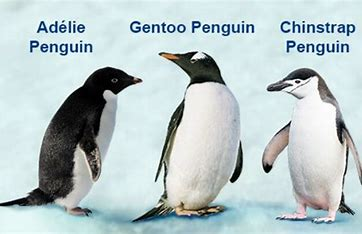

#1 Limpieza del dataset

In [90]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [93]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,0


In [7]:
#df.drop('sex', axis=1, inplace=True)

In [92]:
df['sex'] = df['sex'].fillna('Male')

In [94]:
df.dropna(inplace=True)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_(Pygoscelis_antarctica)_04.jpg/1200px-South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_(Pygoscelis_antarctica)_04.jpg" border="5" alt="Chinstrap" width=200 align="right">

#2 Preprocesamiento

In [95]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [96]:
df['island'] = df['island'].astype('category')
df['species'] = df['species'].astype('category')

In [97]:
codificador = OneHotEncoder()
codificador_2 = OneHotEncoder()


codificacion = codificador.fit_transform(df[["island"]])
codificacion_2 = codificador_2.fit_transform(df[["species"]])

In [98]:
print(type(codificacion))
print(codificacion)
print(codificacion.toarray())

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 2)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 2)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (317, 0)	1.0
  (318, 0)	1.0
  (319, 0)	1.0
  (320, 0)	1.0
  (321, 0)	1.0
  (322, 0)	1.0
  (323, 0)	1.0
  (324, 0)	1.0
  (325, 0)	1.0
  (326, 0)	1.0
  (327, 0)	1.0
  (328, 0)	1.0
  (329, 0)	1.0
  (330, 0)	1.0
  (331, 0)	1.0
  (332, 0)	1.0
  (333, 0)	1.0
  (334, 0)	1.0
  (335, 0)	1.0
  (336, 0)	1.0
  (337, 0)	1.0
  (338, 0)	1.0
  (339, 0)	1.0
  (340, 0)	1.0
  (341, 0)	1.0
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [99]:
nuevas_cols = pd.DataFrame(codificacion.toarray(),
                           columns=codificador.categories_)
nuevas_cols_2 = pd.DataFrame(codificacion_2.toarray(),
                           columns=codificador_2.categories_)
print(nuevas_cols)

    Biscoe Dream Torgersen
0      0.0   0.0       1.0
1      0.0   0.0       1.0
2      0.0   0.0       1.0
3      0.0   0.0       1.0
4      0.0   0.0       1.0
..     ...   ...       ...
337    1.0   0.0       0.0
338    1.0   0.0       0.0
339    1.0   0.0       0.0
340    1.0   0.0       0.0
341    1.0   0.0       0.0

[342 rows x 3 columns]


In [100]:
df = df.reset_index(drop=True)
nuevas_cols = nuevas_cols.reset_index(drop=True)
nuevas_cols_2 = nuevas_cols_2.reset_index(drop=True)
df = pd.concat([df, nuevas_cols], axis="columns")
df = pd.concat([df, nuevas_cols_2], axis="columns")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,"(Biscoe,)","(Dream,)","(Torgersen,)","(Adelie,)","(Chinstrap,)","(Gentoo,)"
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,0.0,1.0,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,0.0,1.0,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0,0.0,1.0,1.0,0.0,0.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0,0.0,1.0,1.0,0.0,0.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1.0,0.0,0.0,0.0,0.0,1.0
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1.0,0.0,0.0,0.0,0.0,1.0


In [101]:
df.drop("island", axis="columns",inplace=True)
df.drop("species", axis="columns",inplace=True)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,"(Biscoe,)","(Dream,)","(Torgersen,)","(Adelie,)","(Chinstrap,)","(Gentoo,)"
0,39.1,18.7,181.0,3750.0,Male,0.0,0.0,1.0,1.0,0.0,0.0
1,39.5,17.4,186.0,3800.0,Female,0.0,0.0,1.0,1.0,0.0,0.0
2,40.3,18.0,195.0,3250.0,Female,0.0,0.0,1.0,1.0,0.0,0.0
3,36.7,19.3,193.0,3450.0,Female,0.0,0.0,1.0,1.0,0.0,0.0
4,39.3,20.6,190.0,3650.0,Male,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
337,47.2,13.7,214.0,4925.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
338,46.8,14.3,215.0,4850.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
339,50.4,15.7,222.0,5750.0,Male,1.0,0.0,0.0,0.0,0.0,1.0
340,45.2,14.8,212.0,5200.0,Female,1.0,0.0,0.0,0.0,0.0,1.0


In [102]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

In [103]:
df.corr().style.background_gradient(cmap='coolwarm')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,"('Biscoe',)","('Dream',)","('Torgersen',)","('Adelie',)","('Chinstrap',)","('Gentoo',)"
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,-0.323210,0.239319,0.034007,-0.381728,-0.836780,0.448853,0.492547
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.355333,-0.632285,0.456357,0.271373,0.538917,0.320700,-0.824357
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,-0.244215,0.611637,-0.421252,-0.289777,-0.694132,-0.180650,0.868487
body_mass_g,0.595110,-0.471916,0.871202,1.000000,-0.409315,0.627352,-0.460411,-0.258979,-0.556385,-0.291561,0.818198
sex,-0.323210,-0.355333,-0.244215,-0.409315,1.000000,-0.006675,0.014307,-0.009943,0.001757,0.017490,-0.016365
"('Biscoe',)",0.239319,-0.632285,0.611637,0.627352,-0.006675,1.000000,-0.736753,-0.408957,-0.350264,-0.486652,0.767169
"('Dream',)",0.034007,0.456357,-0.421252,-0.460411,0.014307,-0.736753,1.000000,-0.315734,0.015328,0.660536,-0.565214
"('Torgersen',)",-0.381728,0.271373,-0.289777,-0.258979,-0.009943,-0.408957,-0.315734,1.000000,0.470833,-0.208554,-0.313739
"('Adelie',)",-0.836780,0.538917,-0.694132,-0.556385,0.001757,-0.350264,0.015328,0.470833,1.000000,-0.442946,-0.666350
"('Chinstrap',)",0.448853,0.320700,-0.180650,-0.291561,0.017490,-0.486652,0.660536,-0.208554,-0.442946,1.000000,-0.373344


Podemos observar que la del sexo tiene poca correlación con las demás variables, y mucho menos con la de las especies, por lo que la podemos eliminar

In [104]:
df.drop('sex', axis=1, inplace=True)

<img src="https://a0.anyrgb.com/pngimg/794/1956/penguin%D1%8B-%D0%B0%D1%80%D0%BA%D1%82%D0%B8%D0%BA%D0%B8-penguen-adelie-penguin-galapagos-penguin-african-penguin-chinstrap-penguin-gentoo-penguin-mammals-penguin-antarctica.png" border="5" alt="Adelie" width=200 align="left">

#3 Modelo

In [105]:
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Input
import matplotlib.pyplot as plt

In [106]:
data_train = df.iloc[:, :7]
data_test = df.iloc[:, 7:]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,"(Biscoe,)","(Dream,)","(Torgersen,)"
0,39.1,18.7,181.0,3750.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,0.0,0.0,1.0
3,36.7,19.3,193.0,3450.0,0.0,0.0,1.0
4,39.3,20.6,190.0,3650.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
337,47.2,13.7,214.0,4925.0,1.0,0.0,0.0
338,46.8,14.3,215.0,4850.0,1.0,0.0,0.0
339,50.4,15.7,222.0,5750.0,1.0,0.0,0.0
340,45.2,14.8,212.0,5200.0,1.0,0.0,0.0


In [107]:
names = data_test.columns
feature_names = data_train.columns

In [108]:
data_train.shape, data_test.shape

((342, 7), (342, 3))

In [109]:
X_train, X_test, y_train, y_test = train_test_split(data_train, data_test, test_size=0.2, random_state=10)

In [110]:
sc = StandardScaler()
X_train.iloc[:, :4] = sc.fit_transform(X_train.iloc[:, :4])
X_test.iloc[:, :4] = sc.transform(X_test.iloc[:, :4])


In [112]:
classifier = Sequential()
classifier.add(Input(shape=(7,)))
classifier.add(Dense(10, activation = 'relu'))
classifier.add(Dense( 3,activation = 'softmax'))

opt = keras.optimizers.Adam( learning_rate = 0.001 )
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics=['accuracy'])

In [113]:
classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [114]:
%time historial = classifier.fit(X_train, y_train, validation_split=0.2, epochs = 100, verbose = 1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3450 - loss: 1.3302 - val_accuracy: 0.3455 - val_loss: 1.2898
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3196 - loss: 1.3197 - val_accuracy: 0.3455 - val_loss: 1.2278
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3839 - loss: 1.2116 - val_accuracy: 0.3818 - val_loss: 1.1685
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4255 - loss: 1.1824 - val_accuracy: 0.4545 - val_loss: 1.1123
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4189 - loss: 1.1347 - val_accuracy: 0.4727 - val_loss: 1.0582
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4616 - loss: 1.0768 - val_accuracy: 0.5455 - val_loss: 1.0084
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4600 - loss: 1.0233 - val_accuracy: 0.5455 - val_loss: 0.9606
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5202 - loss: 0.9616 - val_accuracy: 0.5455 - val_loss: 0.9167

In [115]:
score = classifier.evaluate(X_test, y_test, verbose=1)
score

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0569 


[0.05602574348449707, 1.0]

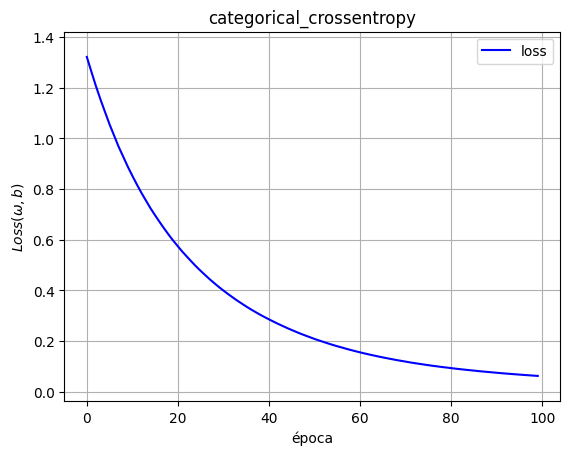

In [116]:
plt.plot(historial.epoch,historial.history['loss'], 'b',label="loss")

plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.ylim([np.min(historial.history['loss'])-0.1,np.max(historial.history['loss'])+0.1])
plt.grid(True)
plt.show()

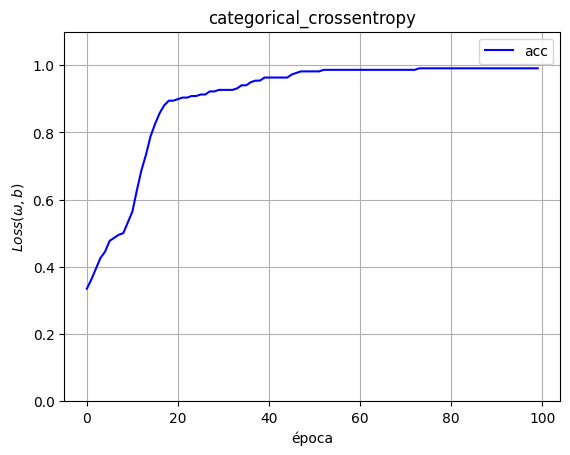

In [117]:
plt.plot(historial.epoch, historial.history['accuracy'], 'b',label="acc")

plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$Loss(\omega, b)$')
plt.legend(loc='upper right')
plt.ylim([0,1.1])
plt.grid(True)
plt.show()

In [118]:
prediccion = classifier.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [119]:
y_pred = np.argmax(prediccion, axis=1)

<img src="https://images.fineartamerica.com/images-medium-large-5/gentoo-penguin-steve-allenscience-photo-library.jpg" border="5" alt="Gentoo" width=200 align="right">

#4 Matriz de confusión

In [120]:
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay

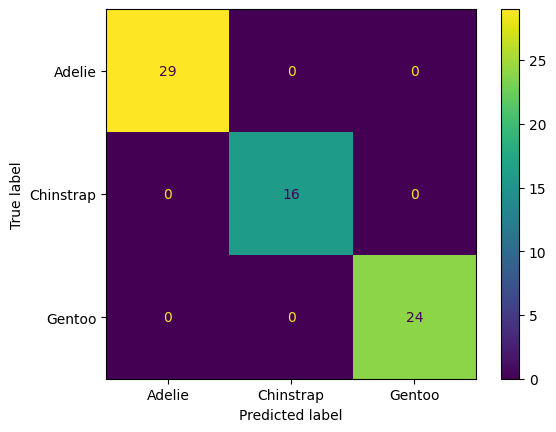

In [121]:
con = confusion_matrix( np.argmax(y_test, axis=1) , y_pred )

disp = ConfusionMatrixDisplay( confusion_matrix = con, display_labels=['Adelie', 'Chinstrap', 'Gentoo'] ).plot()
plt.show()